Fonte: https://www.kaggle.com/unanimad/corona-virus-brazil

<br>

**brazil_covid19_old.csv** - Dados do covid por estado até o dia 30/03


**brazil_cities_coordinates.csv** - Coordenadas das cidades do Brasil 

**brazil_covid19.csv** - Dados do covid por estado e região até dia 24/11


**brazil_covid19_macro** - Dados do covid a nível nacional

**brazil_covid19_cities.csv** - Dados do covid por cidade

**brazil_population_2019** - Dados populacionais do Brasil
 



In [3]:
!python3 -m pip install xlrd
import pandas as pd # Manipulação de banco de dados
import os 
import matplotlib.pyplot as plt # Criação de gráficos
import numpy as np # Criação e Manipulação de arrays
import xlrd
plt.style.use("ggplot")



    100% |████████████████████████████████| 112kB 733kB/s ta 0:00:01


In [5]:
regiao = pd.read_csv('dados/brazil_covid19.csv')
print(regiao)

            date        region state    cases  deaths
0     2020-02-25  Centro-Oeste    DF        0       0
1     2020-02-25  Centro-Oeste    GO        0       0
2     2020-02-25  Centro-Oeste    MS        0       0
3     2020-02-25  Centro-Oeste    MT        0       0
4     2020-02-25      Nordeste    AL        0       0
...          ...           ...   ...      ...     ...
7393  2020-11-24       Sudeste    RJ   340833   22141
7394  2020-11-24       Sudeste    SP  1215844   41455
7395  2020-11-24           Sul    PR   261018    5930
7396  2020-11-24           Sul    RS   301766    6573
7397  2020-11-24           Sul    SC   332076    3530

[7398 rows x 5 columns]


**Gráficos sobre o número de Processos Judiciais relacionados ao Covid-19 atualmente em trâmite na Justiça Trabalhista**:

**Gráfico 01:** Relação entre número de processos individuais e coletivos por estado

**Gráfico 02:** Relação entre valor médio de processos individuais e coletivos por estado

**Gráfico 03:** Quinze países com maior número de casos de Covid-19 e percentual de mortos em relação ao número de casos.

**Gráfico 04:** Relação entre os sete estados mais ajuizadores em comparação com o restante do país.

**Gráfico 05:** Discriminação dos percentuais de cada um dos sete maiores estados ajuizadores.

**Gráfico 06:** Relação entre os sete estados menos ajuizadores em comparação com o restante do país.

**Gráfico 07:** Discriminação dos percentuais de cada um dos sete menores estados ajuizadores.


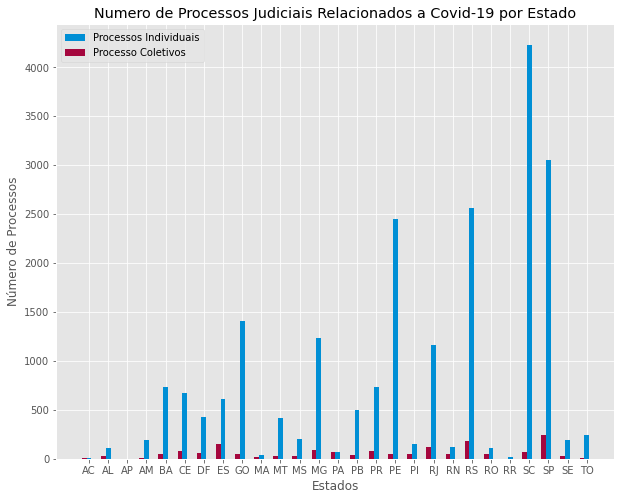

In [6]:
valores = pd.read_csv("dados/processos_judiciais.csv")

fig = plt.figure(figsize=(10,8))
plt.title("Numero de Processos Judiciais Relacionados a Covid-19 por Estado")
plt.xlabel("Estados")
plt.ylabel("Número de Processos")
estados = valores["Estado"]
numero_processos = valores["Prcs. Individuais"]
vmed_individuais = valores["Valor Médio"]
numero_processocoletivos = valores["Prcs. Coletivos"]

x_indexes = np.arange(len(estados))
width = 0.25

plt.bar(estados, numero_processos, width=width, color="#008fd5", label="Processos Individuais")
plt.bar(x_indexes - width, numero_processocoletivos, width=width, color="#A5073E", label="Processo Coletivos")

plt.legend()

plt.show()

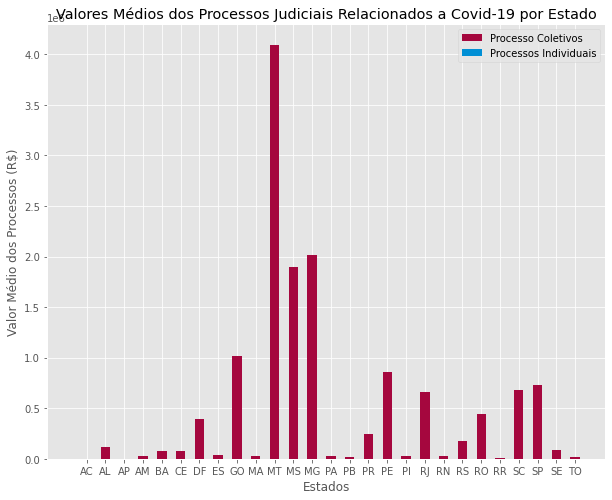

In [9]:

valores = pd.read_csv("dados/processos_judiciais.csv")
valores.columns = ["Estado", 
                   "Prcs. Individuais", 
                   "Valor Médio", 
                   "Prcs. Coletivos",
                   "Valor Médio Coletivo"]

fig = plt.figure(figsize=(10,8))

plt.style.use("ggplot")
plt.title("Valores Médios dos Processos Judiciais Relacionados a Covid-19 por Estado")
plt.xlabel("Estados")
plt.ylabel("Valor Médio dos Processos (R$)")

estados = valores["Estado"]
valores_individuais = valores["Valor Médio"]
valores_coletivos = valores["Valor Médio Coletivo"]

x_indexes = np.arange(len(estados))
width = 0.5

plt.bar(estados, valores_coletivos, width=width, color="#A5073E", label="Processo Coletivos")
plt.bar(x_indexes - width, valores_individuais, width=width, color="#008fd5", label="Processos Individuais")

plt.legend()

plt.show()

/home/ctxo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


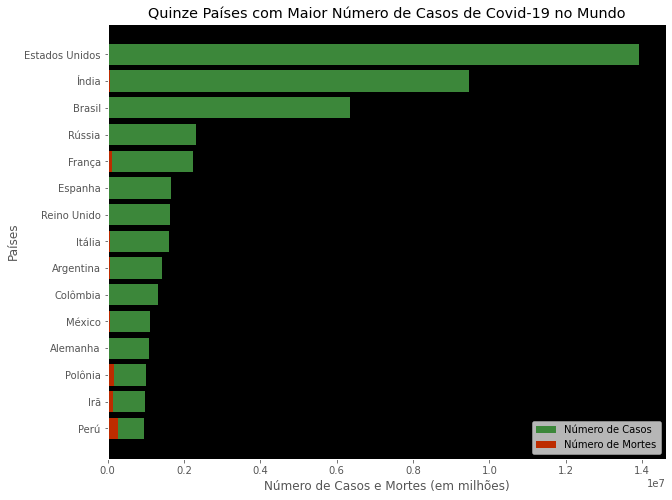

In [10]:

plt.figure(figsize=(10,8))
plt.style.use("ggplot")
plt.grid(False)
paises = ['Estados Unidos', 'Índia', 'Brasil', 'Rússia', 'França', 'Espanha', 'Reino Unido', 'Itália', 'Argentina', 'Colômbia', 'México', 'Alemanha', 'Polônia', 'Irã', 'Perú']
casos = [13923758, 9477602, 6336278, 2322056, 2222488, 1664945, 1629657, 1601554, 1424533, 1316806, 1113543, 1072860, 999924, 975951, 963605]
mortes = [274386, 137816, 173165, 40464, 52731, 45069, 58448, 55576, 38730, 36766, 105940, 16949, 17599, 48628, 35966]

plt.title("Quinze Países com Maior Número de Casos de Covid-19 no Mundo")

ax = plt.axes()
ax.set_facecolor("black")

plt.xlabel("Número de Casos e Mortes (em milhões)")
plt.ylabel("Países")
paises.reverse()
casos.reverse()

plt.barh(paises, casos, color="#3C873A", label="Número de Casos")
plt.barh(paises, mortes, color="#BD2C00", label="Número de Mortes")

plt.legend()

plt.show()

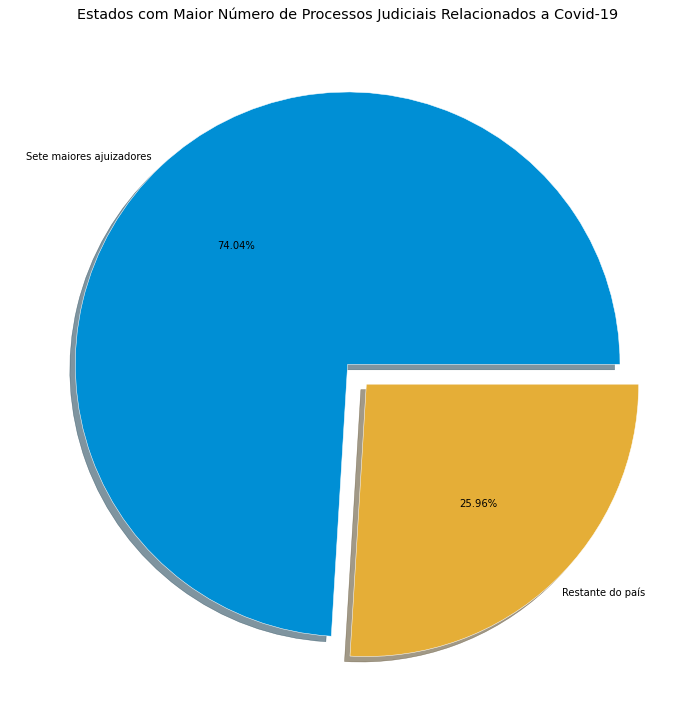

In [11]:
slices = [16118, 5650]
labels = ["Sete maiores ajuizadores", "Restante do país"]
colors = ['#008fd5', '#e5ae37']
explode = [0, 0.1]
fig = plt.figure(figsize=(10,10))

plt.pie(slices, labels=labels, shadow=True, explode=explode, colors = colors, labeldistance=1.05, autopct="%1.2f%%", wedgeprops={'edgecolor': 'white'})

plt.title("Estados com Maior Número de Processos Judiciais Relacionados a Covid-19")
plt.tight_layout()

plt.show()

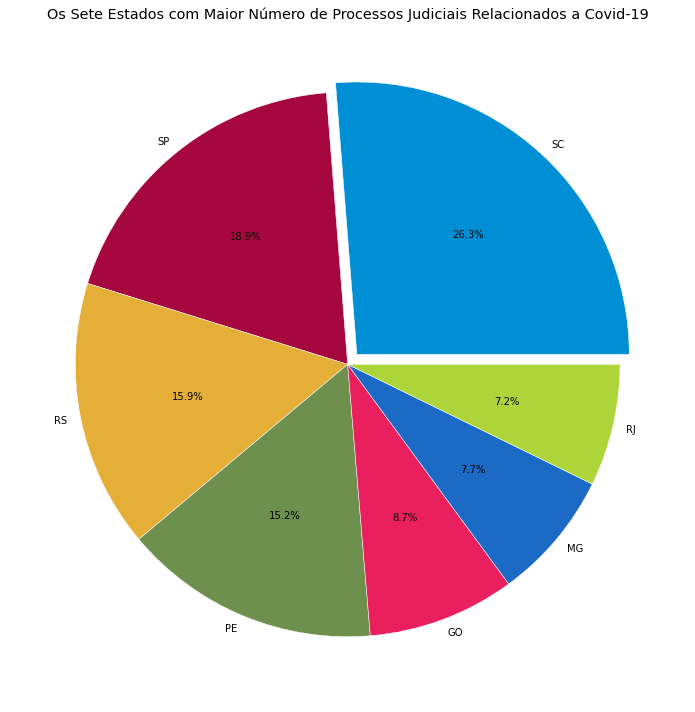

In [12]:
slices = [4231, 3054, 2563, 2454, 1410, 1239, 1167]
labels = ["SC", "SP", "RS", "PE", "GO", "MG", "RJ"]
explode = [0.05, 0, 0, 0, 0, 0, 0]
colors = ['#008fd5', '#A5073E', '#e5ae37', '#6d904f', '#EA205E', "#1B6AC6", "#ADD439"]
fig = plt.figure(figsize=(10,10))
plt.pie(slices, labels=labels, colors = colors, labeldistance=1.05, explode=explode, autopct="%1.1f%%", wedgeprops={'edgecolor': 'white'})

plt.title("Os Sete Estados com Maior Número de Processos Judiciais Relacionados a Covid-19")
plt.tight_layout()

plt.show()

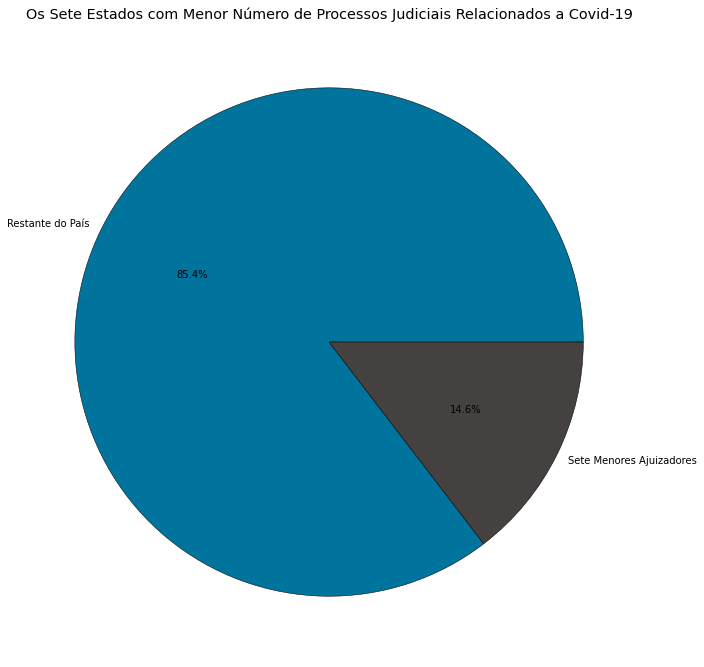

In [13]:
slices = [21314, 3642]
labels = ["Restante do País", "Sete Menores Ajuizadores"]
colors = ['#00749C', '#444140']
fig = plt.figure(figsize=(10,10))

plt.pie(slices, labels=labels, colors = colors, labeldistance=1.05, autopct="%1.1f%%", wedgeprops={'edgecolor': 'black'})

plt.title("Os Sete Estados com Menor Número de Processos Judiciais Relacionados a Covid-19")
plt.tight_layout()

plt.show()

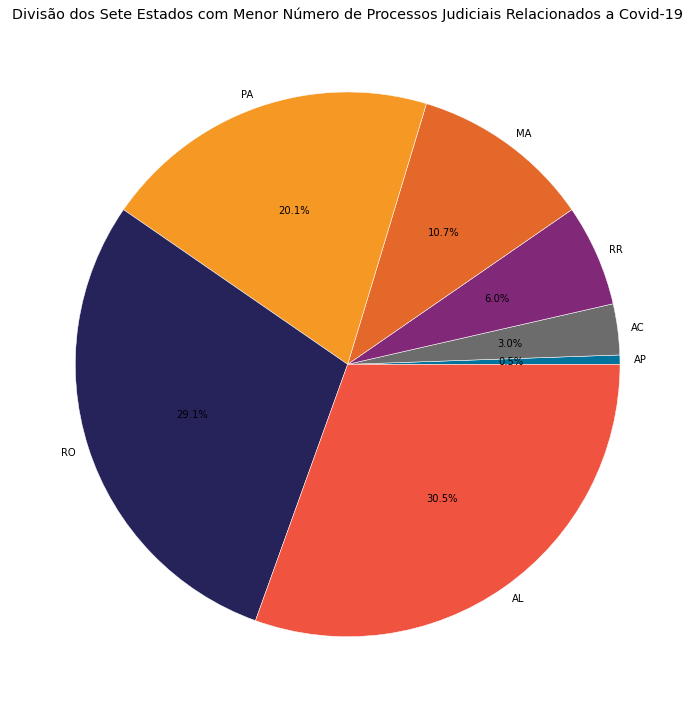

In [14]:
slices = [2, 11, 22, 39, 73, 106, 111]
labels = ["AP", "AC", "RR", "MA", "PA", "RO", "AL"]
colors = ['#00749C', '#6C6C6C', '#812878', '#E4682A', '#F69824', '#26235B', '#F05340']
fig = plt.figure(figsize=(10,10))

plt.pie(slices, labels=labels, colors = colors, labeldistance=1.05, autopct="%1.1f%%", wedgeprops={'edgecolor': 'white'})

plt.title("Divisão dos Sete Estados com Menor Número de Processos Judiciais Relacionados a Covid-19")
plt.tight_layout()

plt.show()

In [17]:
# LENDO OS DADOS 
dados=pd.read_csv('dados/brazil_covid19_cities.csv')
print(dados)


#com esse aqui acho que da pra fazer os top 10-20 de cidades com mais casos

               date state            name      code  cases  deaths
0        2020-03-27    AC      Acrelândia  120001.0      0       0
1        2020-03-27    AC    Assis Brasil  120005.0      0       0
2        2020-03-27    AC       Brasiléia  120010.0      0       0
3        2020-03-27    AC          Bujari  120013.0      0       0
4        2020-03-27    AC        Capixaba  120017.0      0       0
...             ...   ...             ...       ...    ...     ...
1353505  2020-11-24    TO  Tocantinópolis  172120.0    974      21
1353506  2020-11-24    TO        Tupirama  172125.0    101       2
1353507  2020-11-24    TO      Tupiratins  172130.0     18       0
1353508  2020-11-24    TO    Wanderlândia  172208.0    384       5
1353509  2020-11-24    TO         Xambioá  172210.0    996      15

[1353510 rows x 6 columns]


In [18]:
state=dados.loc[dados['state']=='PE'] #Pegando dados só de Pernambuco

In [19]:
#Atribuindo valores
number_cases=state['cases']
number_deaths=state['deaths']

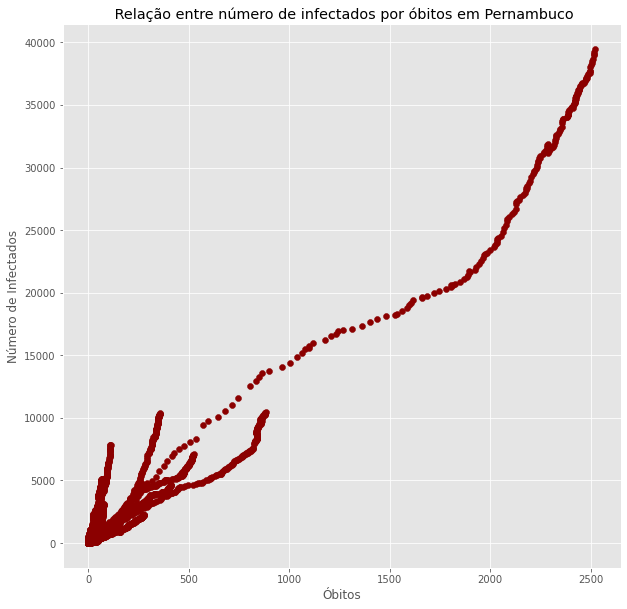

In [20]:
#PLOTANDO GRÁFICO

fig = plt.figure(figsize=(10,10)) 
plt.scatter( number_deaths,number_cases,color='#8B0000')
plt.title(' Relação entre número de infectados por óbitos em Pernambuco')
plt.xlabel('Óbitos')
plt.ylabel('Número de Infectados')
plt.show()



Esse gráfico tipo scatter mostra uma maior concentração de numero de óbitos em Pernambuco no inicio da pandemia, o que já é algo esperado para uma donça que ainda não tem tratamento ao certo ou vacina. Oberva-se uma grande concentração de óbitos mesmo com pouco número de Infectados. Com um aumento do número de infectados, provavelmente com maior número de pessoas sendo testadas, essa concentração diminuiu, entretanto ainda com grande crescimento.

In [23]:
#Gráfico 3D
data_national=pd.read_csv('dados/brazil_covid19_macro.csv') # Dados nacionais
print(data_national)


           date country  week    cases  deaths  recovered  monitoring
0    2020-02-25  Brasil     9        0       0        NaN         NaN
1    2020-02-26  Brasil     9        1       0        NaN         NaN
2    2020-02-27  Brasil     9        1       0        NaN         NaN
3    2020-02-28  Brasil     9        1       0        NaN         NaN
4    2020-02-29  Brasil     9        2       0        NaN         NaN
..          ...     ...   ...      ...     ...        ...         ...
269  2020-11-20  Brasil    47  6020164  168613  5422102.0    429449.0
270  2020-11-21  Brasil    47  6052786  168989  5429158.0    454639.0
271  2020-11-22  Brasil    48  6071401  169183  5432505.0    469713.0
272  2020-11-23  Brasil    48  6087608  169485  5445095.0    473028.0
273  2020-11-24  Brasil    48  6118708  170115  5476018.0    472575.0

[274 rows x 7 columns]


Text(0.5, 0, 'Semanas')

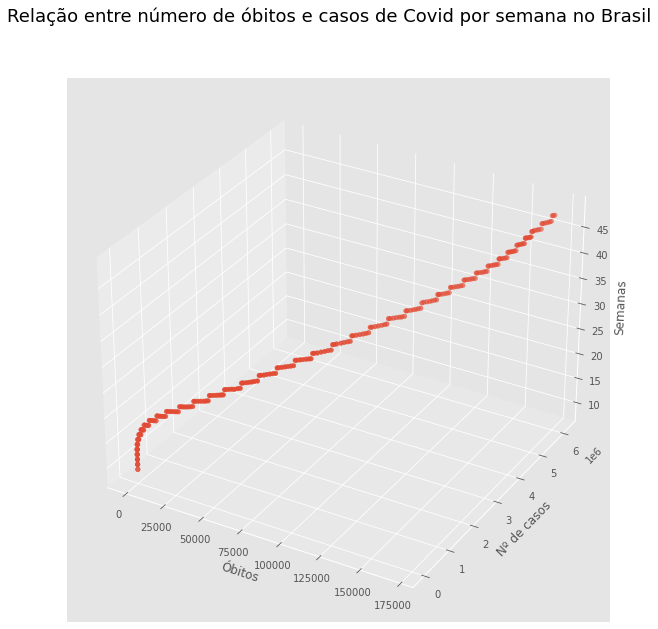

In [24]:
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
fig.suptitle('Relação entre número de óbitos e casos de Covid por semana no Brasil', fontsize=18)
grafico=fig.gca(projection='3d')
week_dados=data_national['week']
cases_dados=data_national['cases']
deaths_dados=data_national['deaths']

ax.scatter(xs=deaths_dados,ys=cases_dados, zs=week_dados, zdir='z', s=20, c=None, depthshade=True)
ax.set_xlabel('Óbitos')
ax.set_ylabel('Nº de casos')
ax.set_zlabel('Semanas')

# ax.plot_wireframe(week_dados, cases_dados, deaths_dados)
# plt.show()





Esse gráfico tridimensional mostra a relação entre óbitos e número de casos de Covid no Brasil numa linha de tempo semanal. No eixo X, temos o número de óbitos, o qual teve um crescimento maior e mais linear no início e com o passar do tempo foi se tornando mais 'curvo'. No eixo Y, temos o número de casos, e no eixo Z, a altura temos as semanas.